#                                       Movies Analysis

## 1. Introduction
#### * Description of the data
- The following dataset contains information about some movies and television shows while also showing their IMDB and TMDB ratings.
- The data contains the following columns:
    1. Id: 
    2. Title: 
    3. Type:
    4. Description:
    5. Release year:
    6. Age certification:
    7. Runtime:
    8. Genres:
    9. Production countries:
    10. Seasons:
    11. IMDB id:
    12. IMDB Score:
    13. IMDB Votes:
    14. TMDB popularity:
    15. TMDB score:


####  Question(s) for Analysis
- Questions to Investigate in the dataset are:
  1. What kind of properties is associated most popular movies?
  2. Which movies/shows have most imbd and tmdb ratings?
  3. Comparison of the imdb and tmdb ratings.
  4. Do movies with higher runtime get higher ratings?
  5. What country produces the most popular movies?
  6. Average runtime for the movies over the years
  7. Most preferred genres of movies and shows.
  
 #### Steps used to analyze the data:
 1. Importing python libraries
 2. Loading the dataset and data wrangling
 3. Data cleaning
 4. Data analysis
 5. Building Insights

## 2. Importing python libraries

In [267]:
import pandas as pd # loading pandas for data manipulation 
import numpy as np  # loading numpy for numerical computation
import seaborn as sb # loading seaborn for visualization 
import matplotlib.pyplot as plt # loading matplotlib for visualization
%matplotlib inline 

In [268]:
# loading the dataset

movies = pd.read_excel(r'D:\Data Analysis Work - Python\Datasets\Netflix Movies Analysis\Movies Dataset.xlsx')
movies.head(20) # visual inspection of our data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5
7,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,"['drama', 'music', 'romance', 'family']",['US'],NaN,tt0058385,7.8,94121.0,15.949,7.6
8,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'drama']",['US'],NaN,tt0080453,5.8,69053.0,44.038,6.2
9,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['drama', 'crime', 'action']",['US'],NaN,tt0061418,7.7,111189.0,15.309,7.5


A quick scan of our data shows us the following:
    1. Some of the columns/fields have blanks
    2. Columns Title and Description contain narrations as data entries.
    3. Column genres and production countries contain more than one value in a list separated by a comma delimiter. 
    4. Column names are not well labelled
    5. Column for production country contains acronyms for the countries; e.g. US for United States. 

## 3. Data Wrangling

In [269]:
# number of rows and columns

movies.shape

(5806, 15)

- The movies data has 5806 records/rows and 15 columns/fields

In [270]:
# names of the columns

movies.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [271]:
# showing the datatypes in each of the fields

movies.dtypes


id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

- Some fields have invalid data types such as release_year which is of datatype 'int' instead of 'datetime'

In [272]:
# getting more information about the dataset

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
id                      5806 non-null object
title                   5805 non-null object
type                    5806 non-null object
description             5788 non-null object
release_year            5806 non-null int64
age_certification       3196 non-null object
runtime                 5806 non-null int64
genres                  5806 non-null object
production_countries    5806 non-null object
seasons                 2047 non-null float64
imdb_id                 5362 non-null object
imdb_score              5283 non-null float64
imdb_votes              5267 non-null float64
tmdb_popularity         5712 non-null float64
tmdb_score              5488 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 680.5+ KB


- Some of the fields such as description, age_certification, and seasons have less than 5806 rows an indication that the columns contain null values. 
- The fields with null values can be visualized below:

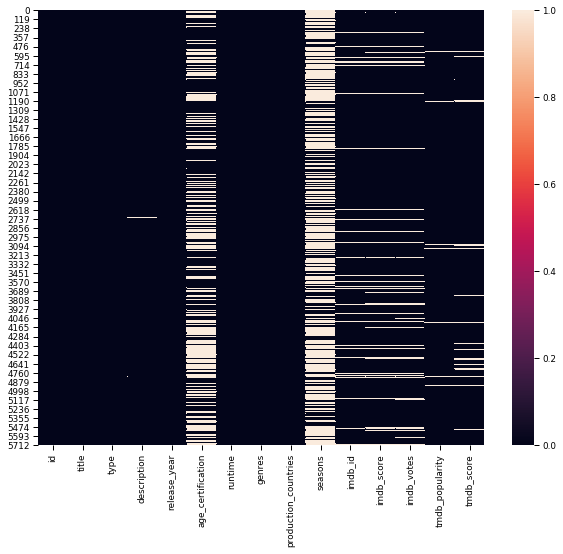

In [273]:
plt.figure(figsize=(10,8)) # showing a visualization for null values
sb.heatmap(movies.isna());

- From the heatmap above, we can see columns that have null values. 

In [274]:
# checking for duplicates

movies.nunique()

id                      5806
title                   5751
type                       2
description             5785
release_year              67
age_certification         11
runtime                  205
genres                  1626
production_countries     449
seasons                   23
imdb_id                 5362
imdb_score                81
imdb_votes              3831
tmdb_popularity         4943
tmdb_score                78
dtype: int64

In [275]:
# checking for duplicates

movies.duplicated().sum()

0

- Our dataset does not have duplicated records

## 4. Data Cleaning
- The movies dataset needs alittle cleaning before we can begin the analysis.
- Some of the data cleaning issues include:
    1. Dropping some unnecessary columns like description and title.
    2. Dealing with null values in the columns. 
    3. Changing the datatypes of some of the columns
    4. Renaming the columns for easy readability
    5. Splitting the columns with more than one value in a list separated by a comma delimiter.

In [276]:
# create a copy of dataset which we shall use for the data cleaning

clean_movies = movies.copy()
clean_movies.head(2)     

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


### 4.1. Dropping the description and title columns
- I will remove the title and description columns from our dataset since they will not be relevant to my analysis.

In [277]:
# dropping the irrelevant columns using drop function

clean_movies.drop(['title','description'],axis=1,inplace=True)

clean_movies.head()  # validating the cleaning has happened

,id,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


### 4.2. Dealing with null values
- I will remove the title and description columns from our dataset since they will not be relevant to my analysis.

In [278]:
# checking columns with null values

clean_movies.isnull().sum()

id                         0
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

- The columns age_certification, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score
- For the columns seasons, imdb_id, and age_certification we will replace nulls with "Not Indicated"
- For the columns imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score we shall put 0

In [279]:
# creating a function for dealing with null values

def s_obj_fill(col):
    """function to fill missing values within non-numeric columns"""
    col.fillna('Not Indicated',inplace=True)
    

def obj_fill(col):
    """function to fill missing values within non-numeric columns"""
    col.fillna(0,inplace=True)

In [280]:
# dealing with null values in age_certification, and imdb_id
s_obj_fill(clean_movies['age_certification']) 
s_obj_fill(clean_movies['imdb_id'])

In [281]:
# dealing with null values in seasons, imdb_score, imdb_votes, tmdb_popularity, tmdb_score

obj_fill(clean_movies['seasons'])
obj_fill(clean_movies['imdb_score'])
obj_fill(clean_movies['imdb_votes'])
obj_fill(clean_movies['tmdb_popularity'])
obj_fill(clean_movies['tmdb_score'])

In [282]:
# validating if null values are removed
clean_movies.isnull().sum()

id                      0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

### 4.3. Changing the datatypes of columns
- Some of the columns like release_year have an invalid datatype which needs to be changed

In [283]:
# checking the datatypes of columns

clean_movies.dtypes

id                       object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

- All columns have a valid datatype except from seasons and release_year which we shall deal with.

In [284]:
# changing the datatype of column release_year into string and seasons to float

clean_movies['release_year'] = clean_movies['release_year'].astype('str')
clean_movies['seasons'] = clean_movies['seasons'].astype('float')

In [285]:
# validating datatype has been changed

clean_movies.dtypes

id                       object
type                     object
release_year             object
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [286]:
clean_movies.columns

Index(['id', 'type', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

### 4.4. Renaming the columns
- The headers of columns type, genres, and seaons need to be renamed to make them easy to understand

In [287]:
#renaming the columns
clean_movies = clean_movies.rename(columns={'type':'movie/show','genres':'genre','seasons':'number_of_seasons'})

#validating if the renaming has worked
clean_movies.head(1)

,id,movie/show,release_year,age_certification,runtime,genre,production_countries,number_of_seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,Not Indicated,0.0,0.0,0.6,0.0


### 4.5. Splitting the columns with more than one value
- The genre and production country columns contain values with more than one value in a list separated by a comma delimiter.
- These columns will be split and the first value of the list taken as values for the columns in my analysis.



In [288]:
# creating blank columns using a lambda function
clean_movies['genre/type'] = clean_movies.apply(lambda _: '', axis = 1)
clean_movies['country_made'] = clean_movies.apply(lambda _: '', axis = 1)


clean_movies.head(3)

,id,movie/show,release_year,age_certification,runtime,genre,production_countries,number_of_seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre/type,country_made
0,ts300399,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,Not Indicated,0.0,0.0,0.600,0.0,,
1,tm84618,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2,,
2,tm127384,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0,18.216,7.8,,


In [289]:
# filling the new columns with the first values in the list of values contained in columns to be split

clean_movies['genre/type'] = [x.split(',')[-0] for x in clean_movies['genre']]
clean_movies['country_made'] = [x.split(',')[-0] for x in clean_movies['production_countries']]

#validating the changes are made
clean_movies.tail(4)

,id,movie/show,release_year,age_certification,runtime,genre,production_countries,number_of_seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre/type,country_made
5802,tm1108171,MOVIE,2021,Not Indicated,74,"['music', 'documentation']",[],0.0,Not Indicated,0.0,0.0,1.036,8.5,['music',[]
5803,tm1045018,MOVIE,2021,Not Indicated,88,"['family', 'drama']","['NG', 'CA']",0.0,tt14620732,6.5,32.0,0.709,0.0,['family',['NG'
5804,tm1098060,MOVIE,2021,Not Indicated,116,"['action', 'thriller']",[],0.0,tt10168094,6.2,9.0,2.186,0.0,['action',[]
5805,ts271048,SHOW,2021,Not Indicated,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0,0.979,10.0,['family',[]


#### Splitting the movies data
- With my data now pretty clean, I am ready to begin the analysis of the data.
- I will split the data into shows and movies and analyze them separately.

In [290]:
# drop the genres and production_countries columns first

clean_movies.drop(['genre','production_countries'], axis=1,inplace=True)

# create the data for shows and movies 
rated_shows = clean_movies[clean_movies['movie/show']=='SHOW']
rated_movies = clean_movies[clean_movies['movie/show']=='MOVIE']

#saving the cleaned data 
rated_shows.to_csv('RatedShowsData.csv',index=False)
rated_movies.to_csv('RatedMoviesData.csv',index=False) 

## 5. Data analysis
#### (a) The distribution of age certification for the TV shows and movies

Text(0.5, 1.0, 'Age Certification Rating for Movies')

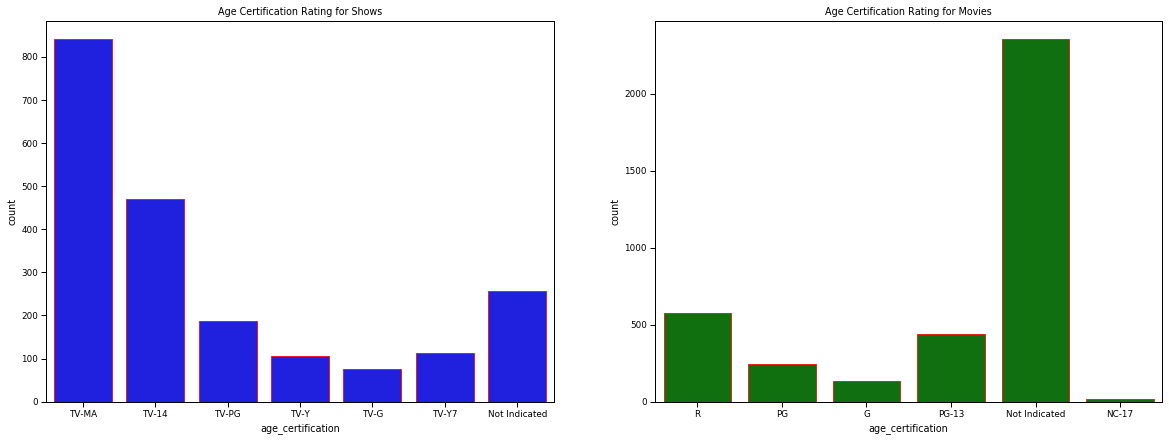

In [291]:
plt.figure(figsize=[20,7])

# visualize to show distribution of TV shows produced by age certification
plt.subplot(1,2,1)

sb.countplot(x='age_certification', data = rated_shows, color = 'blue', edgecolor = 'red')
plt.title("Age Certification Rating for Shows")

# visualize to show distribution of TV Movies produced by age certification
plt.subplot(1,2,2)

sb.countplot(x='age_certification', data = rated_movies, color = 'green', edgecolor = 'red')
plt.title("Age Certification Rating for Movies")

- Therefore, most shows have TV-MA and TV-14 age certification
- While many movies are not age_Certified, those age certified are either rated R or PG

#### (b) The relationship of runtime and popularity on IMDB and TMDB Ratings

Text(0.5, 1.0, 'Does the runtime of a movie affect its popularity?')

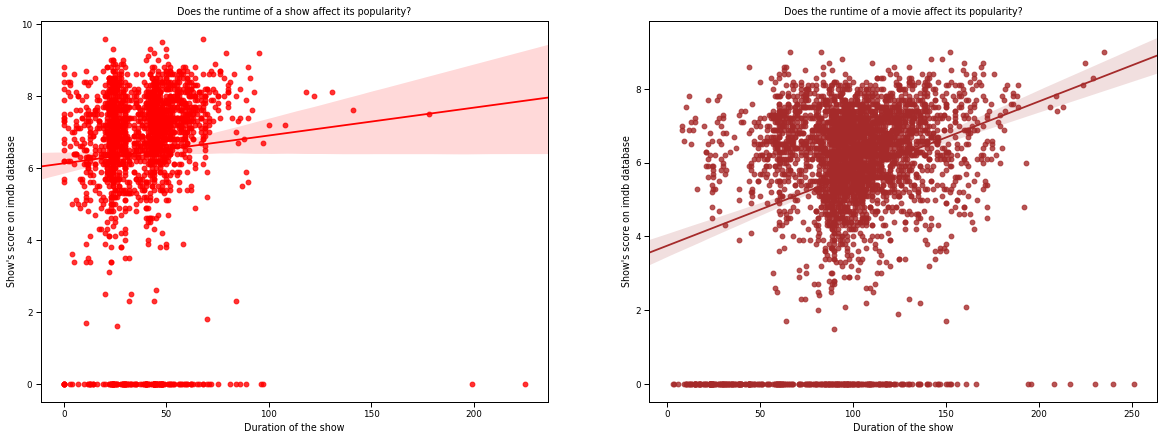

In [292]:
# visualize relationship between runtime and show popularity on IMDB Ratings

plt.figure(figsize=[20,7])

# visualize for Shows
plt.subplot(1,2,1)

# visualize relationship between runtime and show popularity
sb.regplot(data = rated_shows, x = rated_shows['runtime'], y = rated_shows['imdb_score'], scatter =True, color = 'red')

# putting the labels and title of visual
plt.xlabel('Duration of the show')
plt.ylabel("Show's score on imdb database")
plt.title("Does the runtime of a show affect its popularity?")


# visualize for Movies 
plt.subplot(1,2,2)

# visualize relationship between runtime and movies popularity
sb.regplot(data = rated_movies, x = rated_movies['runtime'], y = rated_movies['imdb_score'], scatter =True, color = 'brown')

# putting the labels and title of visual
plt.xlabel('Duration of the show')
plt.ylabel("Show's score on imdb database")
plt.title("Does the runtime of a movie affect its popularity?")

- The runtime of the shows is directly proportional to their popularity/score on the IMDB Database for both shows and movies.

Text(0.5, 1.0, 'Does the runtime of a movie affect its popularity?')

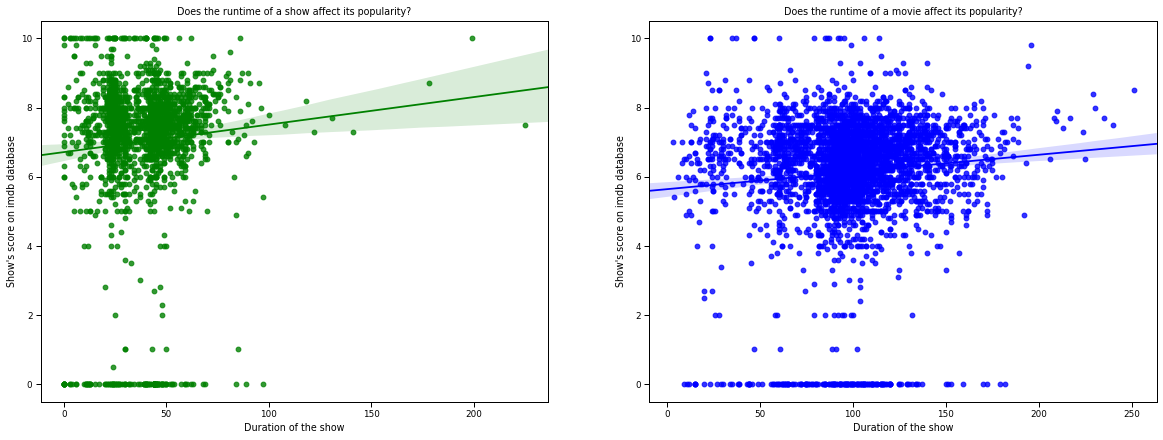

In [293]:
# visualize relationship between runtime and show popularity on TMDB Ratings

plt.figure(figsize=[20,7])

# visualize for Shows
plt.subplot(1,2,1)

# visualize relationship between runtime and show popularity
sb.regplot(data = rated_shows, x = rated_shows['runtime'], y = rated_shows['tmdb_score'], scatter =True, color = 'green')

# putting the labels and title of visual
plt.xlabel('Duration of the show')
plt.ylabel("Show's score on imdb database")
plt.title("Does the runtime of a show affect its popularity?")


# visualize for Movies 
plt.subplot(1,2,2)

# visualize relationship between runtime and show popularity
sb.regplot(data = rated_movies, x = rated_movies['runtime'], y = rated_movies['tmdb_score'], scatter =True, color = 'blue')

# putting the labels and title of visual
plt.xlabel('Duration of the show')
plt.ylabel("Show's score on imdb database")
plt.title("Does the runtime of a movie affect its popularity?")

- The runtime of both movies and shows is directly proportional to their popularity/score on the TMDB Database.

#### (c) The distribution of age certification for the shows and movies

In [294]:
# install wordcloud
!pip install wordcloud

In [295]:
# upgrading the Pillow and WordCloud libraries

!pip install --upgrade Pillow
!pip install --upgrade wordcloud

Requirement already up-to-date: Pillow in c:\users\admin\anaconda3\lib\site-packages (9.5.0)
Requirement already up-to-date: wordcloud in c:\users\admin\anaconda3\lib\site-packages (1.9.2)


In [296]:
# loading the word cloud libraries
import wordcloud
from wordcloud import WordCloud

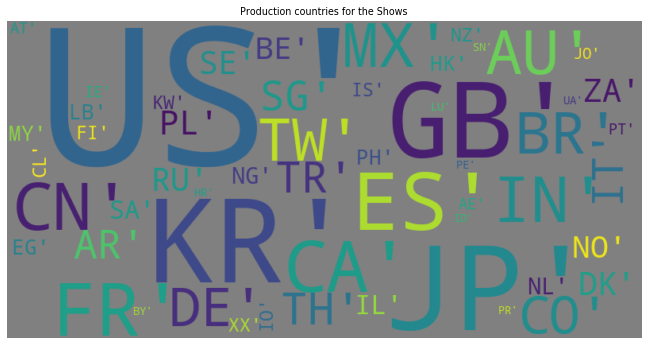

In [297]:
# visualize for Shows
plt.figure(figsize=(25, 20))
plt.subplot(1,2,1)

# Define text or list
text = ' '.join(rated_shows['country_made'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='grey').generate(text)

# Plot the word cloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Production countries for the Shows')
plt.axis('off')

# Show the plot
plt.show()

- From the presentation, the United States (US), Great Britain (GB), and Japan (JP) dominate in the production of the countries.
- Other notable countries are France (FR), Canada (CA) Spain (ES), and Australia (AU). 

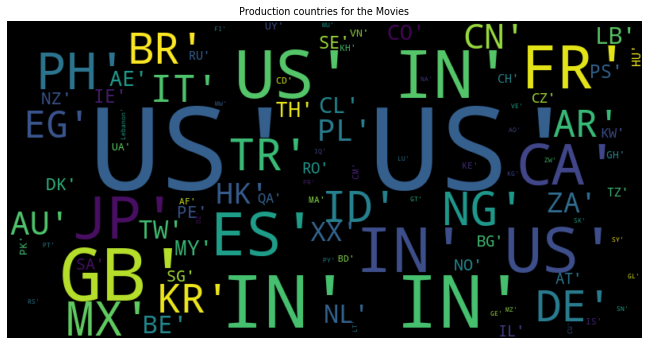

In [298]:
# visualize for Shows
plt.figure(figsize=(25, 20))
plt.subplot(1,2,1)

# Define text or list
text = ' '.join(rated_movies['country_made'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Plot the word cloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Production countries for the Movies')
plt.axis('off')

# Show the plot
plt.show()

- From the presentation, the United States (US) dominate in the production of the countries.
- Other notable countries are France (FR), Great Britain (GB), Canada (CA), India (IN), Spain (ES), and Australia (AU). 

#### (d) The distribution of average runtime over the years

Text(0.5, 1.03, 'Total Number of movies released over the years')

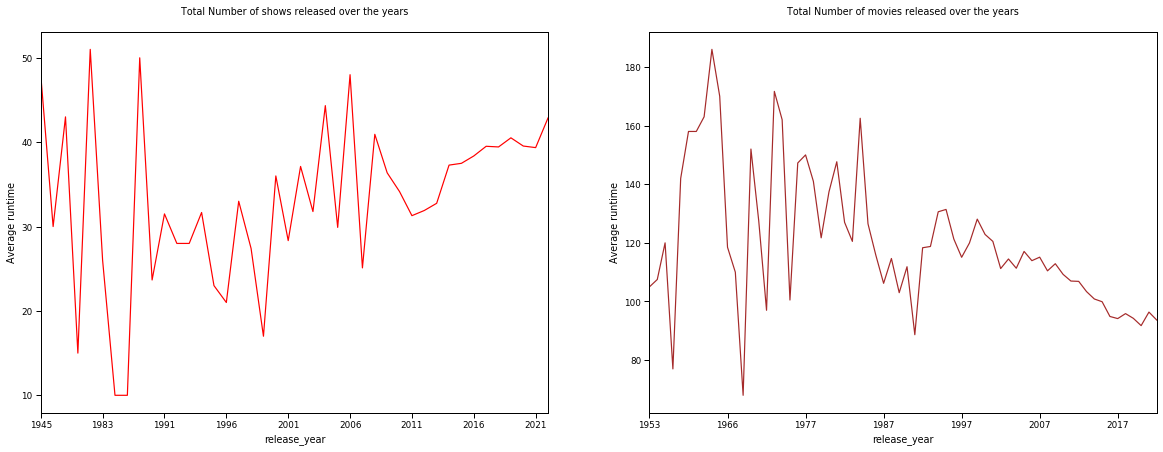

In [299]:
plt.figure(figsize=[20,7])

# visualize for Shows
plt.subplot(1,2,1)

# showing the average runtime over the years

rated_shows.groupby('release_year')['runtime'].mean().plot(kind='line', color='red')

plt.xlabel('release_year')
plt.ylabel('Average runtime')
# plt.xticks(rotation=45)
plt.title('Total Number of shows released over the years', y=1.03)


# visualize for Movies 
plt.subplot(1,2,2)
# showing the average runtime over the years

rated_movies.groupby('release_year')['runtime'].mean().plot(kind='line', color='brown')

plt.xlabel('release_year')
plt.ylabel('Average runtime')
# plt.xticks(rotation=45)
plt.title('Total Number of movies released over the years', y=1.03)


- The average runtime of shows over the years, has been wavy. However, since 2011, the average runtime has been increasing upwardly to between 40 and 50 minutes.
- The average runtime of movies over the years, has been on the decline. The decline is actually noticeable between 1997 and 2021.

#### (e) The relationship between number of seasons and movie popularity

Text(0.5, 1.0, 'Does the number of seasons affects the rating of a movie on TMDB website?')

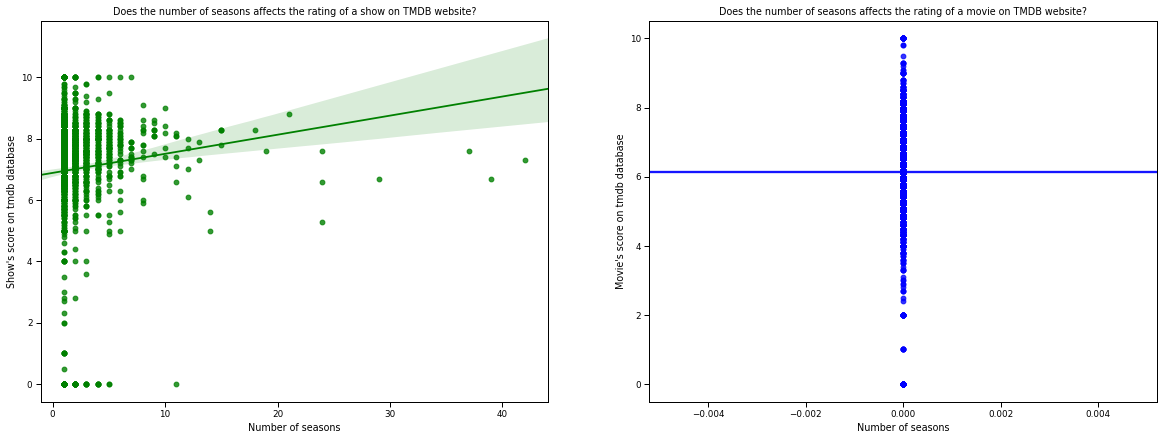

In [303]:
# visualize relationship between runtime and show popularity on TMDB Ratings

plt.figure(figsize=[20,7])

# visualize for Shows
plt.subplot(1,2,1)

# visualize relationship between runtime and show popularity
sb.regplot(data = rated_shows, x = rated_shows['number_of_seasons'], y = rated_shows['tmdb_score'], scatter =True, color = 'green')

# putting the labels and title of visual
plt.xlabel('Number of seasons')
plt.ylabel("Show's score on tmdb database")
plt.title("Does the number of seasons affects the rating of a show on TMDB website?")


# visualize for Movies 
plt.subplot(1,2,2)

# visualize relationship between runtime and show popularity
sb.regplot(data = rated_movies, x = rated_movies['number_of_seasons'], y = rated_movies['tmdb_score'], scatter =True, color = 'blue')

# putting the labels and title of visual
plt.xlabel('Number of seasons')
plt.ylabel("Movie's score on tmdb database")
plt.title("Does the number of seasons affects the rating of a movie on TMDB website?")

Text(0.5, 1.0, 'Does the number of seasons affects the rating of a movie on IMDB website?')

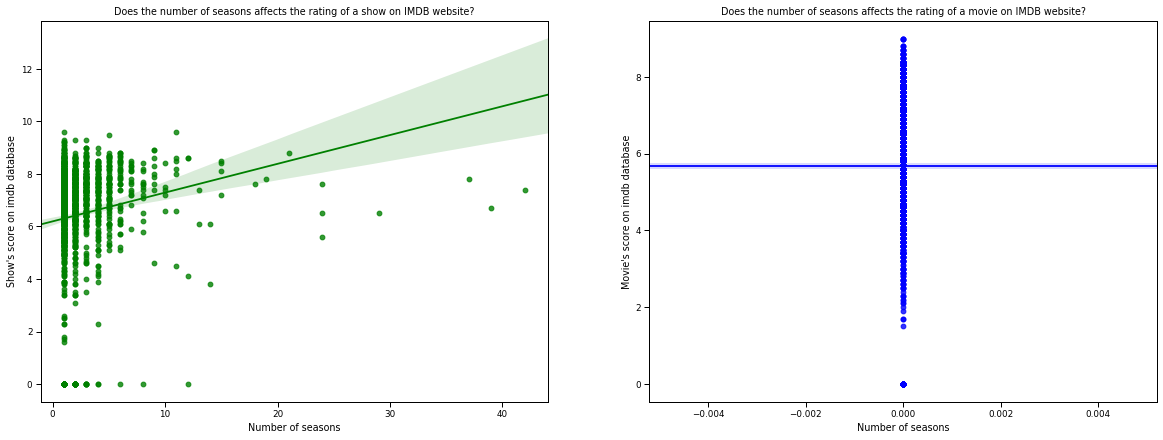

In [304]:
# visualize relationship between runtime and show popularity on TMDB Ratings

plt.figure(figsize=[20,7])

# visualize for Shows
plt.subplot(1,2,1)

# visualize relationship between runtime and show popularity
sb.regplot(data = rated_shows, x = rated_shows['number_of_seasons'], y = rated_shows['imdb_score'], scatter =True, color = 'green')

# putting the labels and title of visual
plt.xlabel('Number of seasons')
plt.ylabel("Show's score on imdb database")
plt.title("Does the number of seasons affects the rating of a show on IMDB website?")


# visualize for Movies 
plt.subplot(1,2,2)

# visualize relationship between runtime and show popularity
sb.regplot(data = rated_movies, x = rated_movies['number_of_seasons'], y = rated_movies['imdb_score'], scatter =True, color = 'blue')

# putting the labels and title of visual
plt.xlabel('Number of seasons')
plt.ylabel("Movie's score on imdb database")
plt.title("Does the number of seasons affects the rating of a movie on IMDB website?")

- There is a direct relationship between number of seasons and popularity on both TMDB and IMDB. However, there is not relationship between number of seasons and popularity on TMDB for movies.

## 6. Conclusion and Limitations
#### Conclusions
- Mmost shows have TV-MA and TV-14 age certification while movies are rated R and PG.
- Movies and shows with a higher runtime are likely to be rated highly. 
- Most of the shows were produced in the United States (US), Great Britain (GB), and Japan (JP). 
- Most of the movies were produced were produced in the United States (US).
- The average runtime of shows over the years, has been wavy. However, since 2011, the average runtime has been increasing upwardly to between 40 and 50 minutes.
- The average runtime of movies have been on the decline which is noticeable between 1997 and 2021.
- Shows with more number of seasons are likely to score a higher rating on both IMDB and TMDB.This is not the case with movies. 

#### Limitations
- The dataset contains null values such as in number of seasons which might not be representative of whole data. 
- The dataset contains only 5806 movies/shows which is not the exact number for whole duration. 
- The columns genre and production countries should be split into one value for ease analysis and reduced assumptions made. 

### Analysis by:
            - Vincent Muiruri
            - signed, V.M. 29th April 2023. 